In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import numpy as np
import requests
import numpy.linalg as la

In [2]:
states_df=pd.DataFrame(pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv"))
disaster_df=pd.DataFrame(pd.read_csv("cleaned_data.csv"))

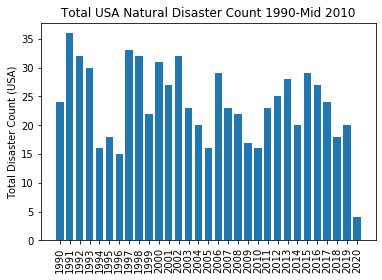

In [3]:
by_year_df=disaster_df.groupby("Year")
by_year_df.head()
by_year_df.count()
states=states_df["usa_state"].tolist()
year_counts=by_year_df.count()["Disaster Subgroup"].tolist()
years_list=disaster_df["Year"].unique().tolist()
plt.bar(range(len(year_counts)),year_counts,width=.75)
tick_locations = [value for value in range(len(year_counts))]
plt.xticks(tick_locations, years_list,rotation=90)
plt.ylabel("Total Disaster Count (USA)")
plt.tick_params(labelsize=10)
plt.title("Total USA Natural Disaster Count 1990-Mid 2010")
plt.savefig("Total USA Natural Disaster Count 1990-Mid 2010.png")
#The ending date of 2010 is to match the available gas data for each state that will be used later on.

In [5]:
cs_states=disaster_df["Location"].tolist()
state_counts=[]
for st in states:
    count=0
    for string in cs_states:
        if str(string).count(st)>0:
            count=count+1
    state_counts.append(count)

In [6]:
states_df["State Counts"]=state_counts
states_df

usa_state_code  usa_state_latitude  usa_state_longitude  \
0              AK           63.588753          -154.493062   
1              AL           32.318231           -86.902298   
2              AR           35.201050           -91.831833   
3              AZ           34.048928          -111.093731   
4              CA           36.778261          -119.417932   
5              CO           39.550051          -105.782067   
6              CT           41.603221           -73.087749   
7              DC           38.905985           -77.033418   
8              DE           38.910832           -75.527670   
9              FL           27.664827           -81.515754   
10             GA           32.157435           -82.907123   
11             HI           19.898682          -155.665857   
12             IA           41.878003           -93.097702   
13             ID           44.068202          -114.742041   
14             IL           40.633125           -89.398528   
15             IN           40.551217           -85.602364   
16             KS           39.011902           -98.484246   
17             KY           37.839333           -84.270018   
18             LA           31.244823           -92.145024   
19             MA           42.407211           -71.382437   
20             MD           39.045755           -76.641271   
21             ME           45.253783           -69.445469   
22             MI           44.314844           -85.602364   
23             MN           46.729553           -94.685900   
24             MO           37.964253           -91.831833   
25             MS           32.354668           -89.398528   
26             MT           46.879682          -110.362566   
27             NC           35.759573           -79.019300   
28             ND           47.551493          -101.002012   
29             NE           41.492537           -99.901813   
30             NH           43.193852           -71.572395   
31             NJ           40.058324           -74.405661   
32             NM           34.972730          -105.032363   
33             NV           38.802610          -116.419389   
34             NY           43.299428           -74.217933   
35             OH           40.417287           -82.907123   
36             OK           35.007752           -97.092877   
37             OR           43.804133          -120.554201   
38             PA           41.203322           -77.194525   
39             PR           18.220833           -66.590149   
40             RI           41.580095           -71.477429   
41             SC           33.836081           -81.163725   
42             SD           43.969515           -99.901813   
43             TN           35.517491           -86.580447   
44             TX           31.968599           -99.901813   
45             UT           39.320980          -111.093731   
46             VA           37.431573           -78.656894   
47             VT           44.558803           -72.577841   
48             WA           47.751074          -120.740139   
49             WI           43.784440           -88.787868   
50             WV           38.597626           -80.454903   
51             WY           43.075968          -107.290284   

               usa_state  State Counts  
0                 Alaska             7  
1                Alabama           106  
2               Arkansas           103  
3                Arizona            27  
4             California           104  
5               Colorado            70  
6            Connecticut            47  
7   District of Columbia            17  
8               Delaware            34  
9                Florida            82  
10               Georgia            99  
11                Hawaii             5  
12                  Iowa            89  
13                 Idaho            16  
14              Illinois           134  
15               Indiana           108  
16                K

In [7]:
fema_df=pd.DataFrame(pd.read_csv("Fema_DisasterDeclarationsSummaries.csv"))
fema_group=fema_df.groupby(["state","Year"])
year_state_counts=[]
stcodes=states_df["usa_state_code"].tolist()
del stcodes[7]
del stcodes[39]
#Don't have gas data for D.C. and Purto Rico, So they're removed
for code in stcodes:
    year_state_counts.append(fema_group.count().loc[code]["disasterNumber"])
for num in range(len(year_state_counts)):
    for ID in year_state_counts[num].index:
        if (ID <1984) or (ID >2010):
            del year_state_counts[num][ID]
for num in range(len(year_state_counts)):
    for year in np.arange(1984,2011):
        try:
            print(year_state_counts[num][year])
        except:
            year_state_counts[num][year]=0
#The above code solves the issue of haveing mismatched data lengths. Many states had 0 natural
#disasters in a few years so this code creates a data point to ensure every state has data from 
#1984-2010

6
1
3
1
1
3
4
2
14
1
20
3
13
5
11
1
4
10
2
60
12
27
43
17
3
44
19
17
28
31
38
67
141
8
71
47
3
11
37
21
5
6
53
22
22
20
23
28
75
7
121
106
25
2
9
17
5
2
3
4
8
10
7
3
43
15
1
3
24
8
39
3
10
12
4
1
11
33
3
99
4
48
41
10
1
14
23
24
82
57
32
38
11
13
15
1
1
3
1
13
12
4
15
80
4
2
2
4
1
5
1
2
6
8
6
3
3
13
7
5
2
2
1
1
4
1
3
1
19
11
15
28
25
16
197
171
45
35
12
232
122
1
28
119
29
47
15
13
51
119
8
57
1
111
159
22
21
70
1
6
2
3
3
1
1
5
7
4
3
3
1
5
4
56
16
9
114
31
83
38
23
21
77
99
84
85
1
117
10
30
16
46
1
4
2
8
23
8
3
16
1
39
16
19
44
7
1
10
16
4
102
6
11
43
17
11
31
73
21
6
85
13
34
63
67
89
179
3
1
109
37
6
10
57
32
3
1
15
31
151
20
214
123
69
92
28
90
19
4
101
61
3
32
37
76
119
105
122
9
73
26
91
4
14
52
53
36
9
8
12
3
22
23
11
60
38
260
24
3
161
11
13
8
11
1
10
7
1
7
5
26
3
8
9
17
1
1
9
11
15
44
24
3
14
4
9
11
12
1
17
22
7
8
6
7
28
1
18
16
16
7
21
30
7
5
15
1
2
6
26
83
12
10
8
10
57
15
26
133
9
23
72
20
7
87
18
8
6
37
86
11
30
10
137
18
62
22
6
11
79
76
37
115
71
37
200
74
37
4
1
35
72
2

In [8]:
temp=pd.DataFrame(data=year_state_counts,index=stcodes)
temp=temp.transpose()
temp.to_csv("disaster_count_by_year&state.csv")
temp.sum()

AK     103
AL     678
AR     582
AZ     156
CA     621
CO     166
CT      51
DE      15
FL    1105
GA     694
HI      40
IA     863
ID     117
IL     397
IN     811
KS     824
KY     996
LA     804
MA     126
MD     108
ME     204
MI     208
MN     632
MO    1033
MS     639
MT     247
NC     681
ND     615
NE     729
NH     118
NJ     165
NM     192
NV      93
NY     520
OH     548
OK     896
OR     197
PA     485
PR     682
SC     217
SD     592
TN     716
TX    2826
UT      42
VA     842
VT     126
WA     369
WI     372
WV     492
WY      20
dtype: int64

In [10]:
eia="removed so I can push to github safely"
url="http://api.eia.gov/series/?api_key={0}&series_id=PET.EMA_EPM0_PTC_S{1}_DPG.A"
#test=requests.get(url.format(eia)).json()
gas_years=np.arange(1984,2020).tolist()
#test["series"][0]["data"][10][1]   example of grabing gas price
req_list=[]
for code in states_df["usa_state_code"]:
    req_list.append(requests.get(url.format(eia,code)).json())
del req_list[39]
del req_list[7]

In [11]:
mydict={
    "State":states_df["usa_state"],
    "Price":[],
    "Year":gas_years
}
for num in range(len(req_list)):
    for num1 in range(len(req_list[0]["series"][0]["data"])):
        if req_list[num]["series"][0]["data"][num1][1] is None:
            pass
        else:
            mydict["Price"].append(req_list[num]["series"][0]["data"][num1][1])
len(mydict["Price"])/27
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
test=list(chunks(mydict["Price"],27))
dates=np.arange(1984,2011).tolist()
for num in range(len(test)):
    test[num].reverse()
gas_inf_df=pd.DataFrame(test,index=stcodes,columns=dates)
gas_inf_df=gas_inf_df.transpose()
gas_inf_df.to_csv("gas_price_state_year_inflated.csv")
gas_inf_df
#The above code wrangles the gas data from the requests that were appended to req_list.
#The function 'chunks' is a piece of code I found on stackoverflow to cut the single list of gas prices
#into equal lists of 27 elements. The original list was ordered by state alphabetically so this makes 50 
#lists, one corresponding to each state for the years we want.

AK     AL     AR     AZ     CA     CO     CT     DE     FL     GA  \
1984  0.929  0.914  0.893  0.926  0.926  0.907  0.944  0.906  0.921  0.891   
1985  1.009  0.934  0.891  0.927  0.906  0.943  0.954  0.929  0.930  0.925   
1986  0.982  0.664  0.609  0.681  0.668  0.622  0.707  0.649  0.635  0.642   
1987  0.961  0.681  0.661  0.719  0.689  0.688  0.741  0.682  0.703  0.675   
1988  0.949  0.675  0.651  0.675  0.708  0.657  0.782  0.695  0.710  0.673   
1989  0.978  0.809  0.738  0.771  0.783  0.755  0.859  0.787  0.794  0.754   
1990  1.148  0.928  0.874  0.901  0.898  0.874  0.975  0.935  0.921  0.879   
1991  1.039  0.826  0.790  0.774  0.740  0.801  0.900  0.856  0.823  0.808   
1992  1.112  0.791  0.749  0.834  0.850  0.837  0.856  0.803  0.792  0.766   
1993  1.060  0.756  0.731  0.860  0.813  0.826  0.810  0.729  0.771  0.730   
1994  1.098  0.727  0.702  0.826  0.765  0.822  0.777  0.723  0.734  0.691   
1995  1.131  0.772  0.722  0.833  0.785  0.821  0.812  0.792  0.769  0.729   
1996  1.202  0.831  0.792  0.965  0.894  0.910  0.875  0.842  0.842  0.790   
1997  1.176  0.834  0.785  0.968  0.909  0.908  0.872  0.827  0.832  0.766   
1998  0.990  0.663  0.616  0.745  0.738  0.736  0.681  0.653  0.660  0.603   
1999  0.997  0.724  0.698  0.852  0.914  0.818  0.788  0.753  0.744  0.711   
2000  1.330  1.050  1.025  1.147  1.190  1.134  1.168  1.113  1.050  1.027   
2001  1.383  0.968  0.958  1.078  1.155  1.135  1.096  1.006  0.972  0.948   
2002  1.287  0.911  0.902  0.964  1.021  1.009  0.980  0.929  0.933  0.901   
2003  1.480  1.070  1.067  1.312  1.341  1.170  1.180  1.125  1.107  1.080   
2004  1.700  1.379  1.352  1.570  1.653  1.444  1.476  1.432  1.402  1.393   
2005  2.091  1.811  1.761  1.953  1.980  1.861  1.856  1.812  1.821  1.838   
2006  2.395  2.076  2.035  2.191  2.286  2.154  2.205  2.154  2.108  2.095   
2007  2.539  2.274  2.307  2.356  2.493  2.410  2.388  2.274  2.299  2.289   
2008  3.390  2.772  2.706  2.784  2.913  2.768  2.808  2.754  2.767  2.794   
2009  2.613  1.826  1.760  1.907  2.128  1.851  1.943  1.872  1.863  1.851   
2010  3.111  2.256  2.249  2.351  2.537  2.249  2.422  2.313  2.286  2.277   

      ...     SD     TN     TX     UT     VA     VT     WA     WI     WV  \
1984  ...  0.980  0.908  0.919  0.902  0.931  0.980  0.909  0.926  0.950   
1985  ...  0.964  0.903  0.909  0.898  0.946  0.984  0.906  0.926  0.952   
1986  ...  0.668  0.631  0.620  0.628  0.661  0.758  0.650  0.628  0.689   
1987  ...  0.701  0.661  0.666  0.669  0.687  0.775  0.657  0.679  0.716   
1988  ...  0.680  0.670  0.673  0.689  0.710  0.797  0.668  0.661  0.733   
1989  ...  0.837  0.753  0.747  0.761  0.798  0.891  0.748  0.751  0.824   
1990  ...  0.935  0.894  0.897  0.876  0.909  0.991  0.895  0.884  0.935   
1991  ...  0.851  0.787  0.828  0.776  0.809  0.959  0.787  0.815  0.861   
1992  ...  0.829  0.764  0.783  0.795  0.792  0.884  0.820  0.774  0.829   
1993  ...  0.802  0.729  0.745  0.759  0.761  0.831  0.777  0.727  0.792   
1994  ...  0.772  0.707  0.722  0.736  0.735  0.819  0.796  0.725  0.769   
1995  ...  0.795  0.742  0.762  0.776  0.774  0.847  0.839  0.759  0.803   
1996  ...  0.874  0.821  0.825  0.880  0.842  0.908  0.941  0.850  0.851   
1997  ...  0.873  0.802  0.793  0.907  0.834  0.886  0.904  0.818  0.836   
1998  ...  0.706  0.624  0.620  0.709  0.663  0.685  0.713  0.655  0.655   
1999  ...  0.784  0.708  0.708  0.836  0.739  0.803  0.893  0.755  0.723   
2000  ...  1.159  1.026  1.022  1.102  1.080  1.146  1.187  1.099  1.078   
2001  ...  1.106  0.955  0.945  1.023  0.999  1.049  1.104  1.054  0.992   
2002  ...  0.983  0.898  0.893  0.940  0.936  1.000  0.961  0.963  0.940   
2003  ...  1.150  1.070  1.056  1.170  1.109  1.199  1.220  1.147  1.133   
2004  ...  1.427  1.373  1.343  1.430  1.392  1.508  1.502  1.426  1.420   
2005  ...  1.837  1.799  1.776  1.809  1.815  1.894  1.899  1.822  1.830   
2006  ...  2.140  2.064  2.082  2.097  2.111  2.196  2.201  2.123  2.116   


In [12]:
cpi_df=pd.DataFrame(pd.read_csv("cpi_by_year.csv"))
annual_cpi=cpi_df["Annual"]
testing=gas_inf_df
#testing.iloc[0]=testing.iloc[0]+1
annual_cpi=annual_cpi.tolist()
for num in range(len(testing["TX"])):
    testing.iloc[num]=(testing.iloc[num]*annual_cpi[26])/annual_cpi[num]
#cpi forumla=todaycpi/yesterdaycpi=today$/yesterday$
#so today cash=todaycpi*yesterday$/yesterdaycpi
#This code deflates the gas prices; everything is now in 2020 dollars.
testing.to_csv("deflated_gas.csv")
testing

AK        AL        AR        AZ        CA        CO        CT  \
1984  2.269626  2.232979  2.181675  2.262297  2.262297  2.215878  2.306272   
1985  2.445092  2.263346  2.159145  2.246383  2.195494  2.285156  2.311812   
1986  3.046340  2.059847  1.889227  2.112584  2.072256  1.929555  2.193241   
1987  2.865961  2.030925  1.971280  2.144252  2.054784  2.051801  2.209862   
1988  2.805685  1.995614  1.924659  1.995614  2.093177  1.942397  2.311955   
1989  2.643120  2.186384  1.994501  2.083686  2.116117  2.040445  2.321513   
1990  2.713205  2.193253  2.065628  2.129440  2.122350  2.065628  2.304333   
1991  2.500060  1.987535  1.900912  1.862412  1.780601  1.927380  2.165596   
1992  2.686525  1.911008  1.809539  2.014893  2.053548  2.022141  2.068044   
1993  2.587027  1.845087  1.784073  2.098909  1.984201  2.015929  1.976879   
1994  2.666167  1.765304  1.704599  2.005696  1.857575  1.995983  1.886714   
1995  2.705103  1.846454  1.726865  1.992353  1.877547  1.963651  1.942125   
1996  2.704534  1.869773  1.782022  2.171277  2.011525  2.047526  1.968775   
1997  2.648525  1.878291  1.767935  2.180078  2.047202  2.044949  1.963872   
1998  2.568180  1.719903  1.597979  1.932620  1.914462  1.909273  1.766597   
1999  2.368028  1.719611  1.657857  2.023631  2.170891  1.942876  1.871621   
2000  2.460222  1.942281  1.896036  2.121710  2.201252  2.097663  2.160556   
2001  2.652632  1.856650  1.837470  2.067633  2.215321  2.176961  2.102158   
2002  2.639984  1.868706  1.850245  1.977424  2.094346  2.069731  2.010244   
2003  2.606653  1.884539  1.879256  2.310762  2.361839  2.060665  2.078277   
2004  2.534929  2.056275  2.016014  2.341081  2.464846  2.153198  2.200915   
2005  2.555550  2.213344  2.152235  2.386891  2.419890  2.274452  2.268341   
2006  2.591997  2.246758  2.202386  2.371217  2.474031  2.331174  2.386369   
2007  2.540147  2.275027  2.308042  2.357064  2.494126  2.411089  2.389079   
2008  2.899366  2.370809  2.314361  2.381072  2.491402  2.367388  2.401599   
2009  3.094258  2.162310  2.084154  2.258228  2.519932  2.191914  2.300859   
2010  3.111000  2.256000  2.249000  2.351000  2.537000  2.249000  2.422000   

            DE        FL        GA  ...        SD        TN        TX  \
1984  2.213435  2.250081  2.176789  ...  2.394223  2.218321  2.245195   
1985  2.251230  2.253653  2.241536  ...  2.336044  2.188224  2.202764   
1986  2.013314  1.969884  1.991599  ...  2.072256  1.957475  1.923351   
1987  2.033908  2.096535  2.013032  ...  2.090571  1.971280  1.986191   
1988  2.054743  2.099090  1.989701  ...  2.010396  1.980831  1.989701   
1989  2.126928  2.145846  2.037743  ...  2.262056  2.035040  2.018824   
1990  2.209797  2.176709  2.077445  ...  2.209797  2.112897  2.119987   
1991  2.059722  1.980317  1.944224  ...  2.047691  1.893693  1.992348   
1992  1.939999  1.913424  1.850610  ...  2.002814  1.845778  1.891681   
1993  1.779191  1.881696  1.781632  ...  1.957355  1.779191  1.818241   
1994  1.755591  1.782301  1.677888  ...  1.874573  1.716740  1.753163   
1995  1.894290  1.839279  1.743608  ...  1.901465  1.774701  1.822536   
1996  1.894524  1.894524  1.777522  ...  1.966525  1.847273  1.856273   
1997  1.862525  1.873786  1.725145  ...  1.966124  1.806222  1.785952   
1998  1.693961  1.712120  1.564255  ...  1.831450  1.618732  1.608355   
1999  1.788491  1.767115  1.688734  ...  1.862121  1.681609  1.681609   
2000  2.058818  1.942281  1.899736  ...  2.143908  1.897886  1.890487   
2001  1.929535  1.864323  1.818290  ...  2.121338  1.831716  1.812536   
2002  1.905629  1.913834  1.848194  ...  2.016398  1.842040  1.831783   
2003  1.981408  1.949706  1.902152  ...  2.025440  1.884539  1.859882   
2004  2.135305  2.090571  2.077151  ...  2.127849  2.047328  2.002594   
2005  2.214566  2.225565  2.246342  ...  2.245120  2.198678  2.170568   
2006  2.331174  2.281390  2.267321  ...  2.316022  2.233771  2.253252   
2007  2.275027  2.300039  2.290034  ...  2.403085  2.276028  2.285032   
20

In [13]:
top5=testing.loc[:,["TX","OK","MO","KY","FL"]]
def linear_reg(x,y):
    xarr=np.array(x)
    yarr=np.array(y)
    xarr_squared=np.square(xarr)
    xone_one=xarr_squared.sum()
    xone_two=xarr.sum()
    xtwo_one=xarr.sum()
    xtwo_two=np.ones(len(xarr)).sum()
    X=np.array([[xone_one,xone_two],[xtwo_one,xtwo_two]])
    temp=np.zeros(len(xarr))
    for i in range(len(xarr)):
        temp[i]=xarr[i]*yarr[i]
    yone=temp.sum()
    ytwo=yarr.sum()
    Y=np.array([yone,ytwo])
    a=la.solve(X,Y)
    f=lambda z:z*a[0]+a[1]
    return (f,a)
#The linear regression function I made to practice some math concepts.

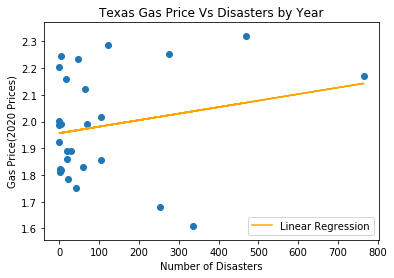

In [14]:
plt.scatter(temp["TX"],top5["TX"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price(2020 Prices)")
tx1,tx2=linear_reg(temp["TX"],top5["TX"])
plt.plot(temp["TX"],tx1(temp["TX"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Texas Gas Price Vs Disasters by Year")
plt.savefig("Texas_graph.png")

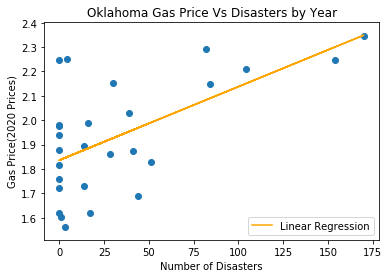

In [15]:
plt.scatter(temp["OK"],top5["OK"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price(2020 Prices)")
tx1,tx2=linear_reg(temp["OK"],top5["OK"])
plt.plot(temp["OK"],tx1(temp["OK"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Oklahoma Gas Price Vs Disasters by Year")
plt.savefig("Oklahoma_graph.png")

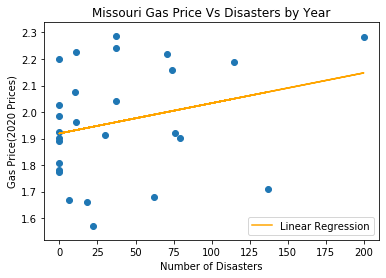

In [16]:
plt.scatter(temp["MO"],top5["MO"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price(2020 Prices)")
tx1,tx2=linear_reg(temp["MO"],top5["MO"])
plt.plot(temp["MO"],tx1(temp["MO"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Missouri Gas Price Vs Disasters by Year")
plt.savefig("Missouri_graph.png")

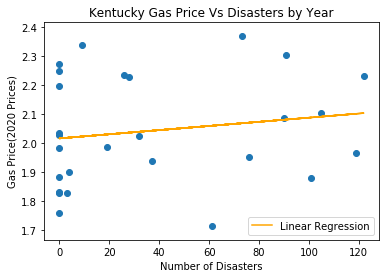

In [17]:
plt.scatter(temp["KY"],top5["KY"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price(2020 Prices)")
tx1,tx2=linear_reg(temp["KY"],top5["KY"])
plt.plot(temp["KY"],tx1(temp["KY"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Kentucky Gas Price Vs Disasters by Year")
plt.savefig("Kentucky_graph.png")

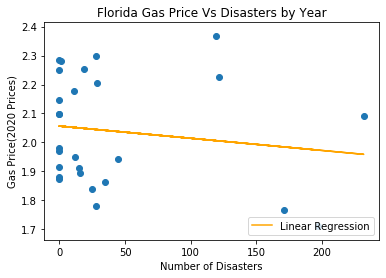

In [18]:
plt.scatter(temp["FL"],top5["FL"])
plt.xlabel("Number of Disasters")
plt.ylabel("Gas Price(2020 Prices)")
tx1,tx2=linear_reg(temp["FL"],top5["FL"])
plt.plot(temp["FL"],tx1(temp["FL"]),label="Linear Regression",color="orange")
plt.legend(loc="lower right")
plt.title("Florida Gas Price Vs Disasters by Year")
plt.savefig("Florida_graph.png")

In [ ]:
slopes=[]
slope_sum=0
for st in stcodes:
    func,coeff=linear_reg(temp[st],testing[st])
    slopes.append(coeff.tolist()[1])
    slope_sum=slope_sum+coeff.tolist()[1]
avg_slope=slope_sum/50
avg_slope